# Simulate Lorenz System with Forth Order Runge Kutta integrator
The Lorenz system is a set of three ordinary differential equations that describes the dynamics of a simple model of atmospheric convection. The equations are:

$$\frac{dx}{dt} = σ(y - x)$$

$$\frac{dy}{dt} = x(ρ - z) - y$$

$$\frac{dz}{dt} = xy - βz$$

where $x$, $y$, and $z$ are the state variables, $t$ is time, and $σ$, $ρ$, and $β$ are system parameters. The Lorenz system is a chaotic system, meaning that small changes in the initial conditions can lead to large differences in the system's behavior over time.

The Lorenz system has been widely studied in mathematics, physics, and other fields, and has been used as a model for a variety of phenomena, including fluid dynamics, chemical reactions, and even stock market prices.

### The Runge-Kutta method:
$$k_1 = h f(x_n, y_n)$$

$$k_2 = h f(x_n + \frac{h}{2}, y_n + \frac{k_1}{2})$$

$$k_3 = h f(x_n + \frac{h}{2}, y_n + \frac{k_2}{2})$$

$$k_4 = h f(x_n + h, y_n + k_3)$$

$$y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$


In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Lorenz's parameter (chaotic)
sigma = 10
beta = 8/3
rho = 28

In [2]:
def Euler(f, x0, t0, tf, h):
    t = np.arange(t0, tf+h, h)
    n=len(t)
    m=len(x0)
    x = np.zeros((n,m))
    x[0] = x0
    
    for i in range (1, len(t)):
        x[i] = x[i-1] + h * f(t[i-1] , x[i-1])
        
    return t , x

In [3]:
def rk4(f, x0, t0, tf, h):
    t = np.arange(t0, tf+h, h)
    n=len(t)
    m=len(x0)
    x = np.zeros((n,m))
    x[0] = x0
    
    for i in range (1, len(t)):
        k1 = h * f(t[i-1] , x[i-1])
        k2 = h * f(t[i-1]+ h/2 , x[i-1]+ k1/2 )
        k3 = h * f(t[i-1]+ h/2 , x[i-1]+ k2/2)
        k4 = h * f(t[i-1]+ h ,  x[i-1]+ k3)
        x[i] = x[i-1] + (1/6)*(k1 +2*k2 + 2*k3 + k4)
        
    return t , x

    """
    Implement the fourth-order Runge-Kutta method to solve a system of
    first-order differential equations.

    Parameters:
    f: function that takes in the current state and time, and returns the
       derivative of the state at that point
    x0: initial state vector
    t0: initial time
    tf: final time
    dt: time step

    Returns:
    t: array of time values
    x: array of state vectors at each time point
    """

In [4]:
def lorenz(t, x):
    dx_dt = np.zeros(3)
    dx_dt[0] = sigma * (x[1] - x[0])
    dx_dt[1] = x[0] * (rho - x[2]) - x[1]
    dx_dt[2] = x[0] * x[1] - beta * x[2]
    return dx_dt

    """
    Calculate the derivative of the Lorenz system at a given point.

    Parameters:
    x: array containing the current state of the system
    t: current time
    sigma, rho, beta: system parameters

    Returns:
    dx_dt: array containing the derivatives of the state variables
    """

## Runge-Kutta Method

In [5]:
# Set initial conditions and simulation parameters
x0 = np.array([1.0, 1.0, 1.0])
t0 = 0.0
tf = 50.0
dt = 0.01

# Run the simulation using RK4
t, x = rk4(lorenz, x0, t0, tf, dt)

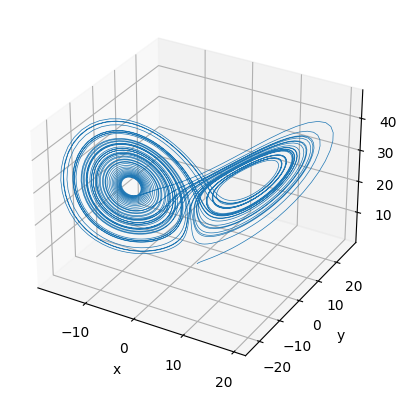

In [6]:
# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[:,0], x[:,1], x[:,2], linewidth=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Euler's Method

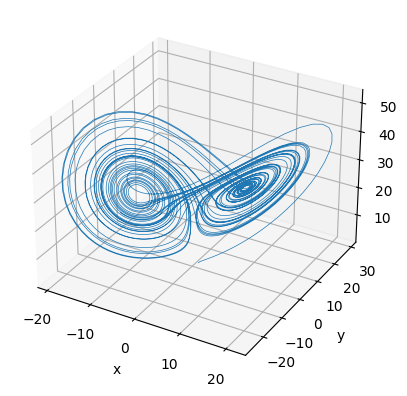

In [7]:
# Set initial conditions and simulation parameters
xx0 = np.array([1.0, 1.0, 1.0])
tt0 = 0.0
ttf = 50.0
ddt = 0.01

# Run the simulation using Euler's method
t, x = Euler(lorenz, xx0, tt0, ttf, ddt)
# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[:,0], x[:,1], x[:,2], linewidth=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Comparison

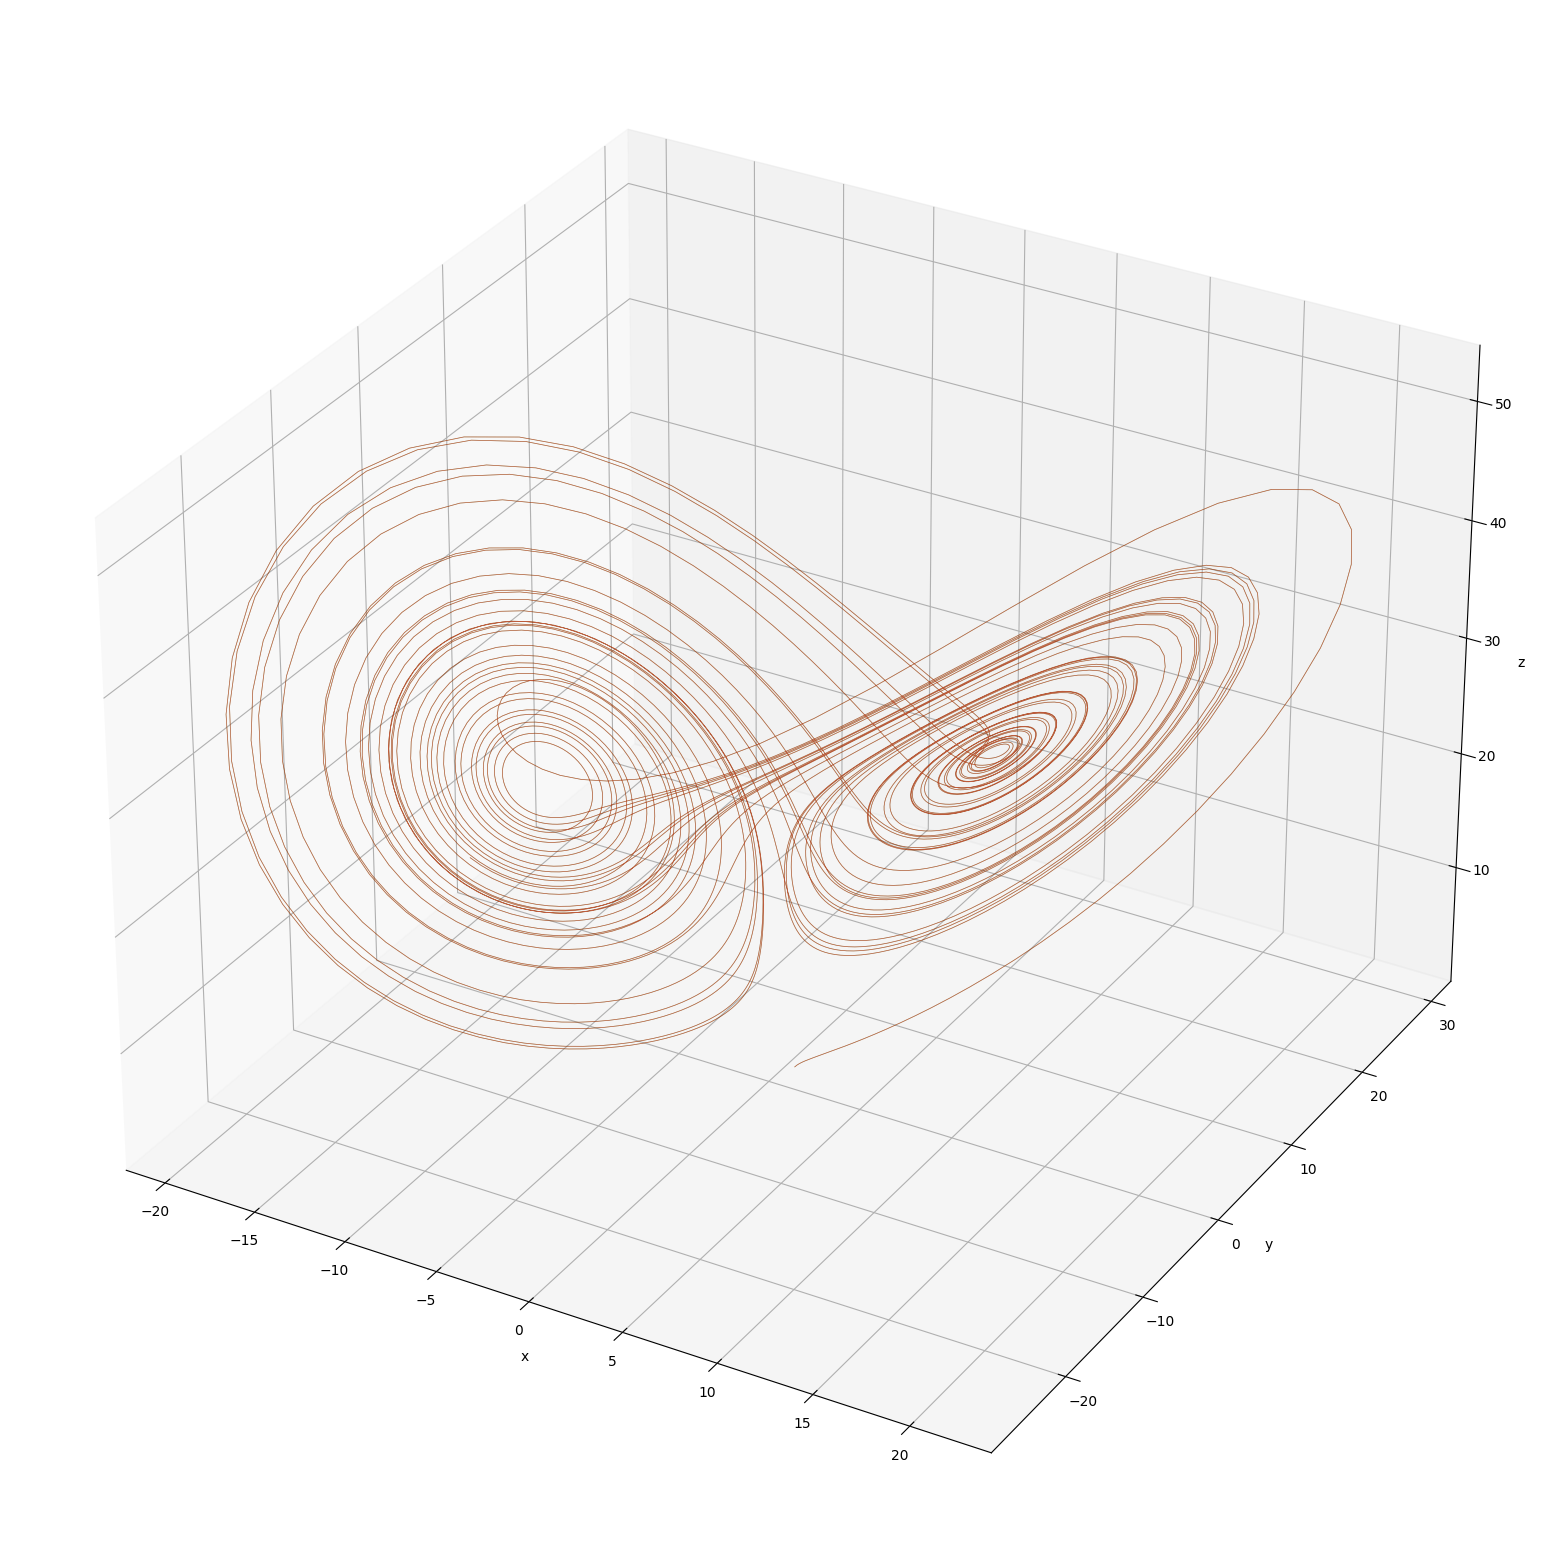

In [15]:
# Plot the results
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[:,0], x[:,1], x[:,2], linewidth=0.5, color='g',alpha=0.5)

# Run the simulation using RK4
t, x = Euler(lorenz, x0, t0, tf, dt)
# Plot the results
ax.plot(x[:,0], x[:,1], x[:,2], linewidth=0.5,color='r',alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#### 